In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data = pd.read_csv("z_stats_running.csv")

In [4]:
data.head()

,Unnamed: 0,label,RBC2barrier,inflation,scan_date,FOV,bandwidth,ven_defect,ven_low,ven_high,...,rbc_low,rbc_high,rbc_SNR,rbc_mean,rbc_median,rbc_SD,rbc_negative,KCO_esti,VA_esti,DLCO_esti
0,s000001,Healthy,0.549054,3.653717,4/25/2018,40.0,398.596939,0.023437,0.121320,0.157695,...,0.215962,0.046958,4.633671,0.317240,0.308668,0.163630,0.019019,NaN,NaN,NaN
1,s000001A,NaN,0.500032,3.084198,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s000001A_highBW,Healthy,0.500032,3.752991,7/5/2018,40.0,797.193878,0.031266,0.152979,0.120574,...,0.198637,0.116501,3.053313,0.403706,0.376073,0.242379,0.032819,NaN,NaN,NaN
3,s000001B_highBW,NaN,0.509816,4.841125,7/17/2018,40.0,398.596939,0.078243,0.278559,0.078672,...,0.223193,0.085782,1.644846,0.289498,0.253236,0.385793,0.116564,NaN,NaN,NaN
4,s000001H_highBW,NaN,0.534890,3.985413,6/6/2019,40.0,797.193878,0.026686,0.153238,0.122349,...,0.234980,0.047207,2.713898,0.338014,0.329244,0.205531,0.051258,NaN,NaN,NaN


In [5]:
data.columns

Index(['Unnamed: 0', 'label', 'RBC2barrier', 'inflation', 'scan_date', 'FOV',
       'bandwidth', 'ven_defect', 'ven_low', 'ven_high', 'ven_SNR', 'ven_mean',
       'ven_median', 'ven_SD', 'bar_defect', 'bar_low', 'bar_high', 'bar_SNR',
       'bar_mean', 'bar_median', 'bar_SD', 'bar_negative', 'rbc_defect',
       'rbc_low', 'rbc_high', 'rbc_SNR', 'rbc_mean', 'rbc_median', 'rbc_SD',
       'rbc_negative', 'KCO_esti', 'VA_esti', 'DLCO_esti'],
      dtype='object')

In [23]:
use_data=data[['label','ven_mean','bar_mean','rbc_mean']]

use_data=use_data.dropna(subset=['label'])

use_data=use_data[use_data['label'].isin(['Healthy','IPF','NSIP'])]

In [24]:
use_data

,label,ven_mean,bar_mean,rbc_mean
0,Healthy,0.662467,0.519029,0.317240
2,Healthy,0.592356,0.708547,0.403706
18,Healthy,0.681617,0.837778,0.447216
21,Healthy,0.578364,0.620228,0.402708
22,Healthy,0.563647,0.796806,0.520189
24,Healthy,0.494540,0.762111,0.517091
25,Healthy,0.467822,1.058279,0.682910
26,Healthy,0.576420,0.561988,0.336131
27,Healthy,0.518060,0.721548,0.419167
28,Healthy,0.581919,0.514472,0.180952


In [25]:
use_data['label']=pd.Categorical(use_data['label'])

In [26]:
use_data['code_label'] = use_data.label.cat.codes

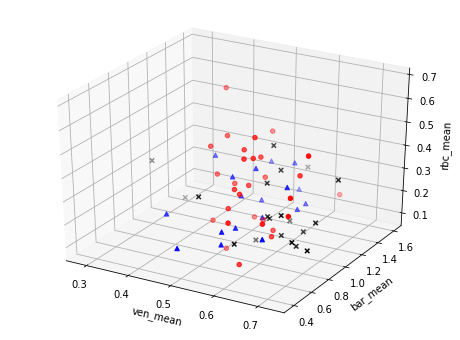

In [27]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

h= use_data[use_data['label']=='Healthy'];
c= use_data[use_data['label']=='IPF'];
n= use_data[use_data['label']=='NSIP'];


ax.scatter(h['ven_mean'], h['bar_mean'], h['rbc_mean'], c='r', marker='o')
ax.scatter(c['ven_mean'], c['bar_mean'], c['rbc_mean'], c='b', marker='^')
ax.scatter(n['ven_mean'], n['bar_mean'], n['rbc_mean'], c='k', marker='x')

ax.set_xlabel('ven_mean')
ax.set_ylabel('bar_mean')
ax.set_zlabel('rbc_mean')

plt.show()

Text(0, 0.5, 'bar_mean')

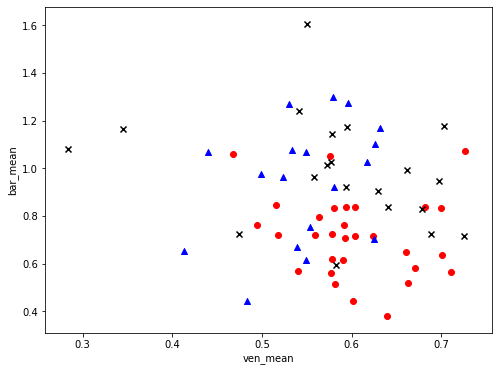

In [28]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.scatter(h['ven_mean'], h['bar_mean'], c='r', marker='o')
ax.scatter(c['ven_mean'], c['bar_mean'], c='b', marker='^')
ax.scatter(n['ven_mean'], n['bar_mean'], c='k', marker='x')

ax.set_xlabel('ven_mean')
ax.set_ylabel('bar_mean')

Text(0, 0.5, 'rbc_mean')

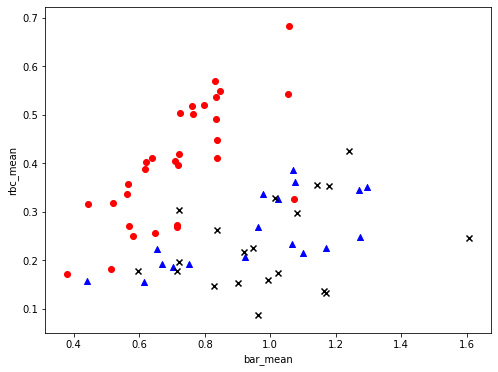

In [29]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.scatter(h['bar_mean'], h['rbc_mean'], c='r', marker='o')
ax.scatter(c['bar_mean'], c['rbc_mean'], c='b', marker='^')
ax.scatter(n['bar_mean'], n['rbc_mean'], c='k', marker='x')

ax.set_xlabel('bar_mean')
ax.set_ylabel('rbc_mean')

In [30]:
svm_data=use_data.drop('label', axis=1)

In [31]:
X = svm_data.drop('code_label', axis=1)
y = svm_data['code_label']

In [32]:
svm_data['code_label'].value_counts()

0    30
2    20
1    18
Name: code_label, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [34]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [35]:
y_pred = svclassifier.predict(X_test)

In [36]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[7 0 0]
 [0 0 3]
 [0 0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.00      0.00      0.00         3
           2       0.57      1.00      0.73         4

    accuracy                           0.79        14
   macro avg       0.52      0.67      0.58        14
weighted avg       0.66      0.79      0.71        14



C:\Users\chope\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Ref
https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/